In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
%load_ext autoreload
%autoreload 2
import model.toxic_model_lib as mdl
import CCPA_lib as cp


In [3]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')

In [4]:

ppallete = 'RdYlGn'#'YlGn_d' #"BuGn_d"
porder = ['MED4',  'MIT9312','MIT0604', 'Natl2A', 'MIT9313']
ppallete = [ '#62A586', '#face6e','#f79934', '#7A9BC8', '#F47681', ]
psizes = [150,120,200,120,350]
pmarkers = ['o', 's', '^', 'D', '*']

# #ffd7a1
    
pedge = 'green'
apallete = "spring"
aorder = ['DE', 'DE1', '1A3', 'ATCC', 'BS11']
amarkers = ['P', 'X', 'h', '<','>']
apallete = ['#6dad36', '#c7e89f', '#f5c4e1', '#d5579d', '#8a0850']

aedge='orange'
epallete = ['#6cf0ba', '#d13f75', '#eeb7cb', '#b9d2d8', '#407f90']
#sns.diverging_palette(355, 217, s=74, l=50, n=4) #'Paired' # 'BrBG'# "coolwarm"
eorder = ['e1','e3', 'e4', 'e5', 'e6']
#aedge='orange'


In [5]:
from sympy import *

In [6]:
df = pd.read_pickle('CCPA.pkl.gz')
df.loc[df.PRO == 'C9B', 'PRO'] = 'MIT0604'

In [7]:
fl2cell_model, compdf = cp.gen_FL2cells_model()
df['cells'] = cp.compute_FL2cells(df['FL'], fl2cell_model)

                            OLS Regression Results                            
Dep. Variable:                    FCM   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     776.5
Date:                Tue, 29 Dec 2020   Prob (F-statistic):           2.49e-90
Time:                        12:54:43   Log-Likelihood:                -6527.3
No. Observations:                 347   AIC:                         1.306e+04
Df Residuals:                     345   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.769e+05   3.27e+06     -0.177      0.8

C:\Users\wosnat\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample,cells
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A",4.105691e+06
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A",5.021082e+06
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A",4.880252e+06
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A",5.760436e+06
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A",2.167415e+07


In [9]:
fcmdflist=list()
for i in os.listdir('fcmfiles'):
    if i.endswith('.csv'):
        d = pd.read_csv(os.path.join('fcmfiles', i))
        n = os.path.splitext(i)[0]
        _, experiment, day = n.split('_')
        d['experiment'] = experiment
        d['day'] = day.replace('Days','')
        fcmdflist.append(d)
fcmdf = pd.concat(fcmdflist)
fcmdf.loc[fcmdf.PRO == 'C9B', 'PRO'] = 'MIT0604'
fcmdf['day'] = pd.to_numeric(fcmdf['day'])

In [198]:
m = mdl.ModelProALT()

In [199]:
m.print_initial_values()

P 50
A 50
N 100
T 0


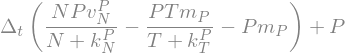

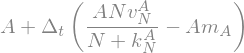

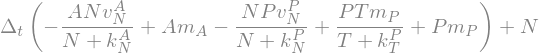

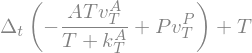

In [200]:
init_printing()
for i in m.intermediate_variables.values():
    display(i.symbol, i.formula)
    print()

for i in m.variables.values():
    display(i.symbol, i.formula)
    print()


In [201]:
m.print_param_values()

k_N_A 0.2502723352076287
k_N_P 0.11008885160313818
v_N_A 1.4582177199759882e-08
v_N_P 1.9e-09
k_T_A 0.05
k_T_P 0.05
v_T_A 1.4582177199759882e-08
v_T_P 1.9e-09
m_A 0.1
m_P 0.1
delta_t 1.1574074074074073e-05


In [202]:
{i : m.parameters[i].value for i in m.parameters}

{'k_N_A': 0.2502723352076287,
 'k_N_P': 0.11008885160313818,
 'v_N_A': 1.4582177199759882e-08,
 'v_N_P': 1.9e-09,
 'k_T_A': 0.05,
 'k_T_P': 0.05,
 'v_T_A': 1.4582177199759882e-08,
 'v_T_P': 1.9e-09,
 'm_A': 0.1,
 'm_P': 0.1,
 'delta_t': 1.1574074074074073e-05}

In [208]:
params_try = {
    'k_N_A': 1,
 'k_N_P': 1,
 'v_N_A': 0.5,
 'v_N_P': 0.5,
# 'k_T_A': 0.05,
# 'k_T_P': 0.05,
# 'v_T_A': 1.4582177199759882e-08,
 'v_T_P': 0,
 'm_A': 0,
 'm_P': 1e-2,
}

In [213]:
m = mdl.ModelProALT()
#m.disable_organism('ALT')
# m.override_initial_values({
#     'A': 0,
#     'P': 0,
#     'x_a': 0,
# })
#m.override_param_values(params_try)
#reference_days = ref_df['day'].unique().tolist()
#max_day = int(ref_df['day'].max()) + 1
max_day = 20
#m.set_referece_times(reference_days)
res, ref_res = m.simulate(num_iterations=max_day*3600*24, collect_every=3600*3)


.................................................................................................................................................................

In [214]:
res_df = pd.DataFrame(res)

In [215]:
res_df.head()

,P,A,N,T,day
0,50.000000,50.000000,100.000000,0.000000e+00,0.000
1,49.378890,49.378890,101.242221,1.180109e-08,0.125
2,48.765495,48.765495,102.469010,2.345555e-08,0.250
3,48.159719,48.159720,103.680561,3.496523e-08,0.375
4,47.561469,47.561470,104.877061,4.633191e-08,0.500


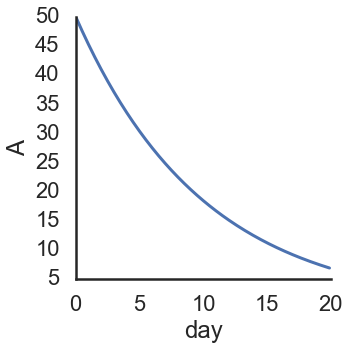

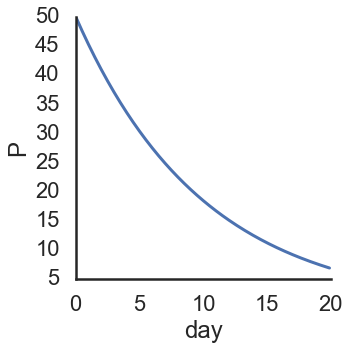

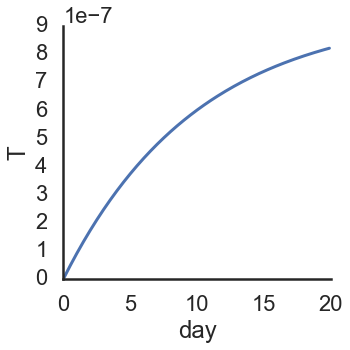

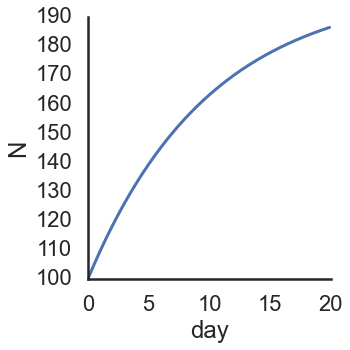

In [216]:
for i in ['A', 'P', 'T', 'N']:
    sns.relplot(data=res_df, x='day', y=i, kind='line')
